In [4]:
from diffusers import DiffusionPipeline
import torch

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_images_side_by_side(image_path1, image_path2, title1="Image 1", title2="Image 2", figsize=(12, 7)):
    # Load images
    img1 = mpimg.imread(image_path1)
    img2 = mpimg.imread(image_path2)

    # Create figure and axes
    fig, axes = plt.subplots(1, 2, figsize=figsize)  # 1 row, 2 columns

    # Display images
    axes[0].imshow(img1)
    axes[0].axis("off")  # Hide axes
    axes[0].set_title(title1)

    axes[1].imshow(img2)
    axes[1].axis("off")  # Hide axes
    axes[1].set_title(title2)

    # Show plot
    plt.show()

In [5]:
model_id = 'black-forest-labs/FLUX.1-dev'
pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.bfloat16).to('cuda')

model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [6]:
lora_pic_a_path = '/root/output/trained_model/trained_model.safetensors'
lora_pic_e_path = '/root/output/trained_model_e/trained_model_e.safetensors'

In [ ]:
pipe.load_lora_weights("trained_model.safetensors", adapter_name="girl")
pipe.load_lora_weights("trained_model.safetensors", adapter_name="girl")

In [9]:
def inference_with_lora(lora_path, prompt):
    pipe.unload_lora_weights()
    pipe.load_lora_weights(lora_path)
    image = pipe(
        prompt=prompt,
        height=1024,
        width=1024,
        num_inference_steps=20,
        guidance_scale=3.0,
    ).images[0]
    pipe.unload_lora_weights()
    return image

In [10]:
pic_a = inference_with_lora(lora_pic_a_path, prompt)
pic_b = inference_with_lora(lora_pic_e_path, prompt)

Token indices sequence length is longer than the specified maximum sequence length for this model (101 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['is framed by an ornate border that matches the design of the chest, featuring scrollwork and jewel - like elements.']


  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['is framed by an ornate border that matches the design of the chest, featuring scrollwork and jewel - like elements.']


  0%|          | 0/20 [00:00<?, ?it/s]

In [12]:
def plot_images(image_1, image_2):
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display images
    axes[0].imshow(image_1)
    axes[0].axis("off")
    axes[0].set_title("Image A")
    
    axes[1].imshow(image_2)
    axes[1].axis("off")
    axes[1].set_title("Image B")
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [14]:
def inference_with_loras(prompt):
    pic_a = inference_with_lora(lora_pic_a_path, prompt)
    pic_b = inference_with_lora(lora_pic_e_path, prompt)
    plot_images(pic_a, pic_b)

In [20]:
prompt = 'p3r5on, The image depicts an ornate treasure chest opened to reveal a collection of coins and jewels. The chest is decorated with intricate patterns and scrollwork, giving it a decorative appearance. The jewelry includes a strand of blue beads and a large red gemstone, adding detail to the treasure within. The lid of the chest features a decorative embellishment resembling a mask or face. The chest is framed by an ornate border that matches the design of the chest, featuring scrollwork and jewel-like elements.'

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['mask or face. the chest is framed by an ornate border that matches the design of the chest, featuring scrollwork and jewel - like elements.']


  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['mask or face. the chest is framed by an ornate border that matches the design of the chest, featuring scrollwork and jewel - like elements.']


  0%|          | 0/20 [00:00<?, ?it/s]

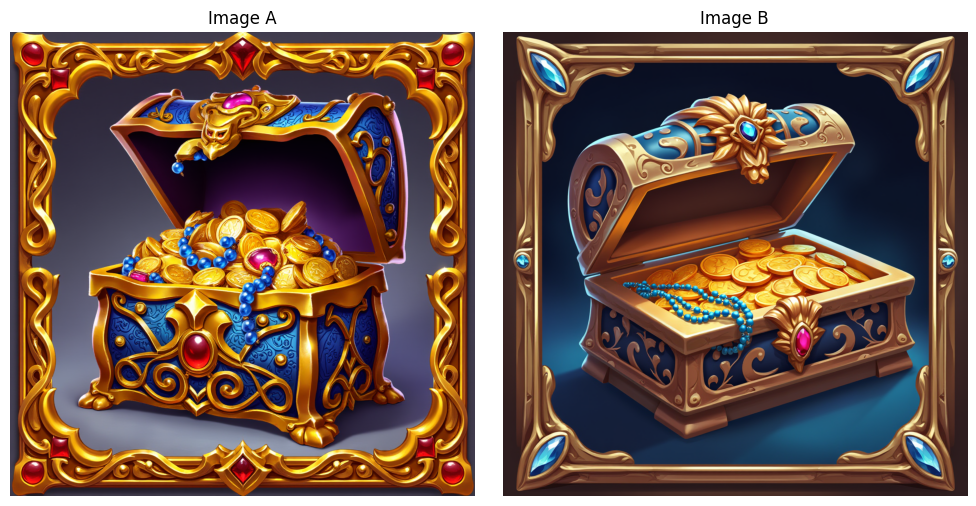

In [21]:
inference_with_loras(prompt=prompt)

In [24]:
prompts = [
    "The image depicts a glossy icon featuring a golden horseshoe. The horseshoe is slightly curved with a polished metallic surface, adorned with small rivets along its edges. The background has a radiant glow, emphasizing its lucky symbolism. The frame around the icon is rounded and ornate, enhancing the premium feel of the image.",
    
    "The image showcases a vibrant slot game icon featuring a juicy watermelon slice. The fruit is depicted in a semi-realistic style, with rich red flesh, dark seeds, and a glossy green rind. Droplets of moisture glisten on the surface, making it appear fresh and appetizing. The square frame has rounded edges and a subtle glow, giving the icon a premium feel.",
    
    "The image features a dynamic slot icon depicting a treasure chest overflowing with gold coins. The chest is ornately decorated with metal reinforcements and a large lock. The lid is slightly open, revealing the shimmering gold inside. The background includes a faint glow, emphasizing the richness and excitement of the treasure.",
    
    "The image depicts a mystical slot game icon featuring a glowing crystal ball. The ball is held by an elegant metallic stand with ornate carvings. Inside the transparent sphere, swirling magical energy is visible. The background has a gradient of deep blues and purples, adding a sense of mystery and enchantment to the composition.",
    
    "The image showcases a glossy icon featuring a red lucky seven symbol. The number '7' is designed in a bold, curvy style with a reflective, metallic sheen. Small sparkles and highlights give it a polished and premium look. The background is a gradient of fiery reds and oranges, reinforcing the theme of luck and excitement.",
    
    "The image depicts a majestic phoenix slot icon. The mythical bird is shown mid-flight with its wings spread wide, composed of vibrant flames. The feathers transition from deep reds to bright golds, giving the appearance of burning embers. The background is dark with fiery accents, making the phoenix stand out as a powerful and legendary figure.",
    
    "The image features a slot game icon of a wizard's spell book. The book has an aged leather cover with glowing magical runes embossed on the front. A golden clasp secures the book, and faint magical energy swirls around it. The background has deep purples and blues, enhancing the mystical aura of the artifact.",
    
    "The image depicts an ancient Egyptian slot icon featuring a golden scarab beetle. The beetle is encrusted with small gemstone details and has an intricate design, symbolizing luck and protection. The background consists of sand-hued textures and faint hieroglyphics, enhancing the historical and mystical theme of the icon.",
    
    "The image showcases a sleek and futuristic slot game icon featuring a neon-lit cyber coin. The coin appears to be floating, with intricate circuit patterns glowing in blue and purple. The metallic surface reflects ambient neon lights, giving it a high-tech aesthetic. The background features a digital grid, reinforcing the cyberpunk theme.",
    
    "The image depicts a fiery dragon's eye slot icon. The eye is intense, with a slit pupil and glowing red and orange hues, resembling molten lava. Scales surround the eye, adding a sense of texture and realism. The background is dark with subtle embers floating, creating a sense of mystery and power."
]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

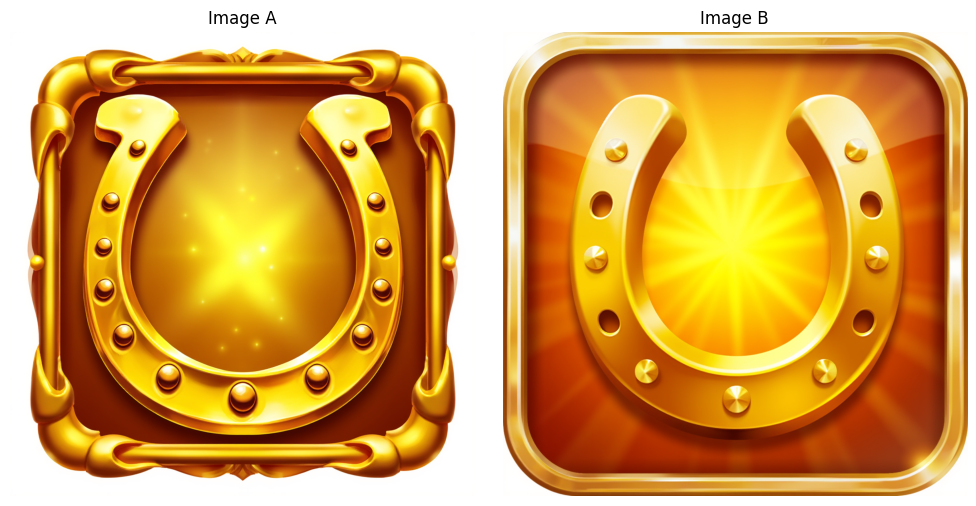

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['giving the icon a premium feel.']


  0%|          | 0/20 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['giving the icon a premium feel.']


  0%|          | 0/20 [00:00<?, ?it/s]

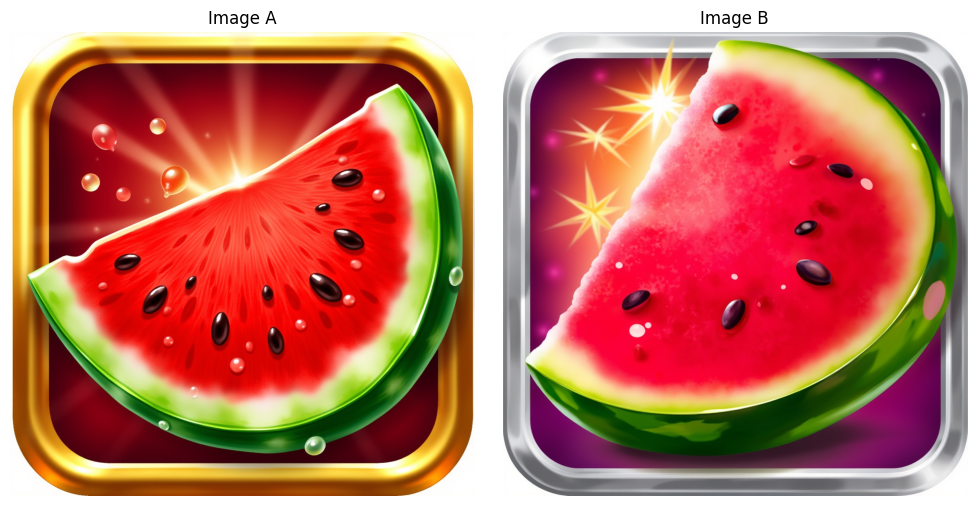

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

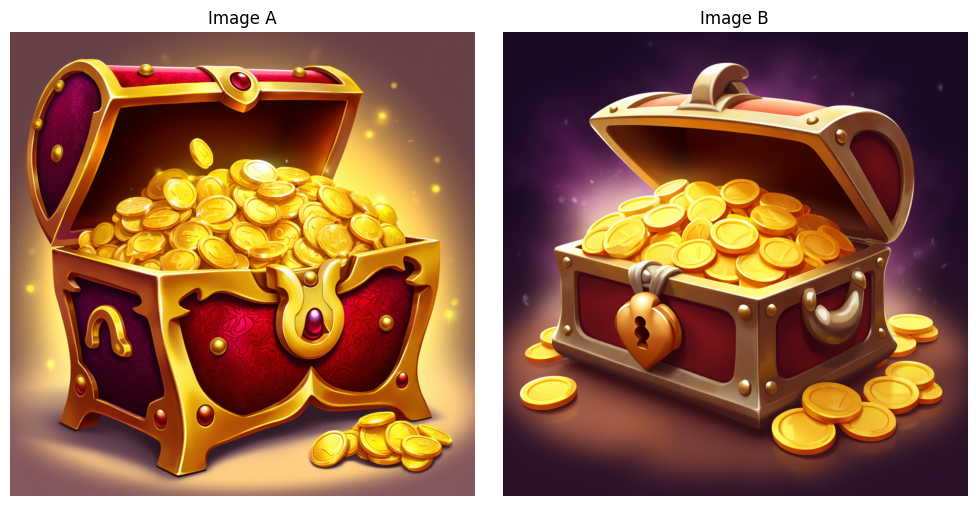

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

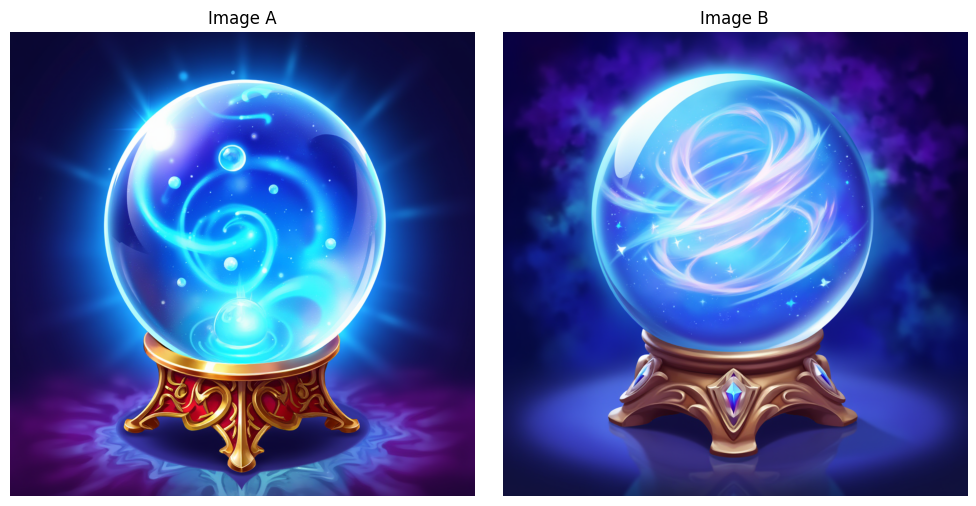

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

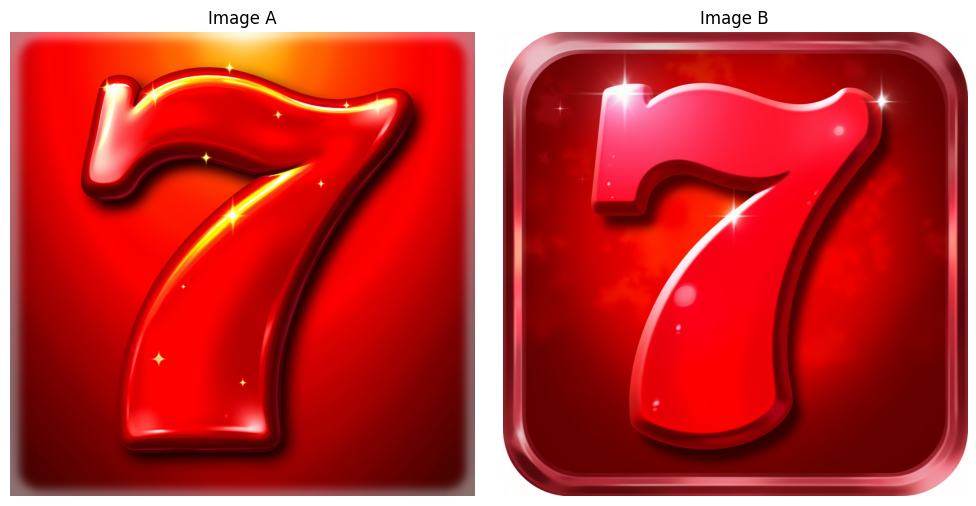

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

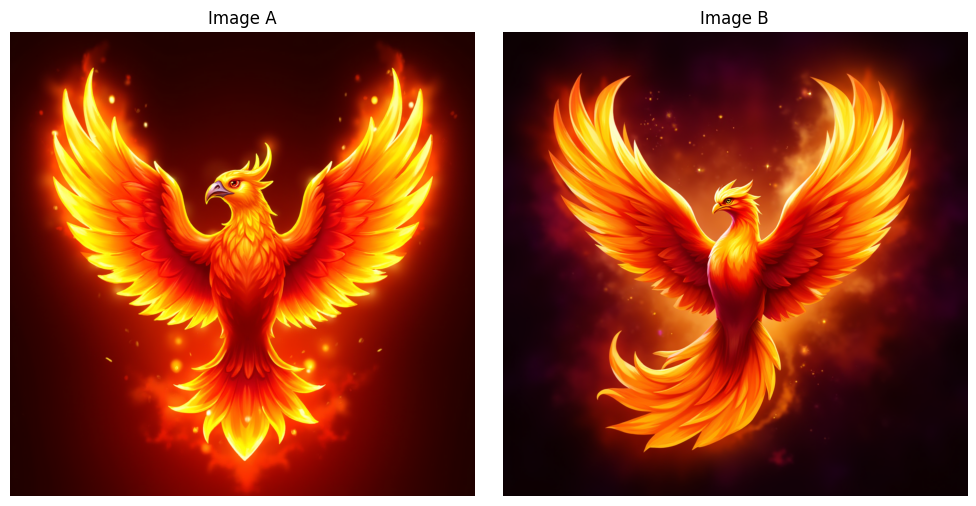

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

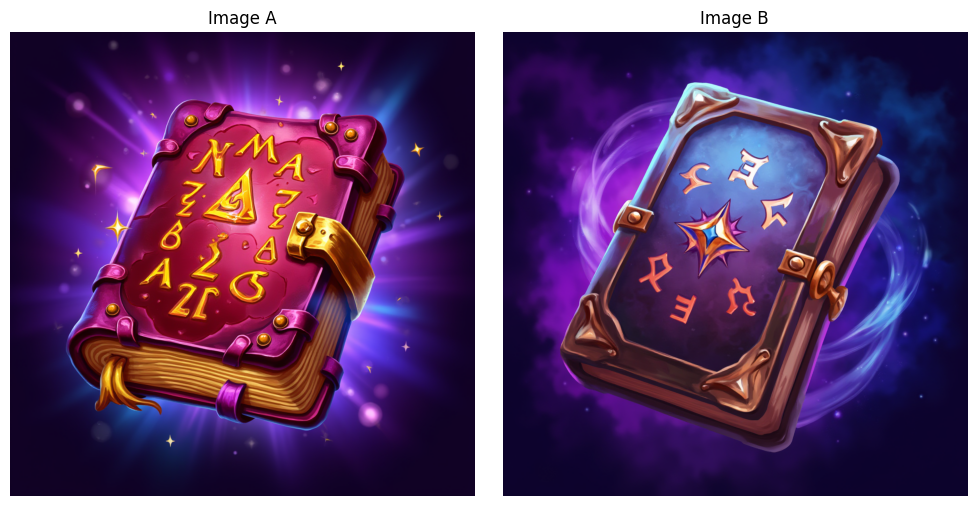

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

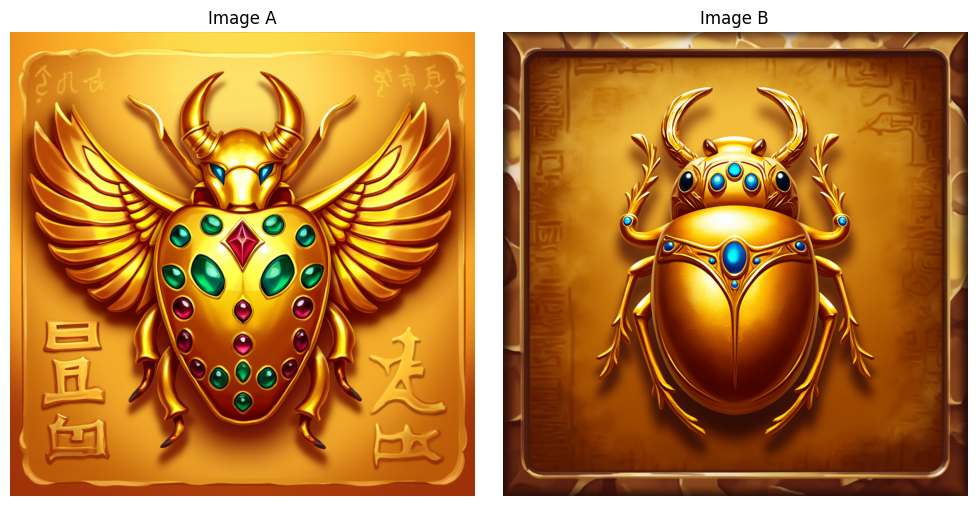

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

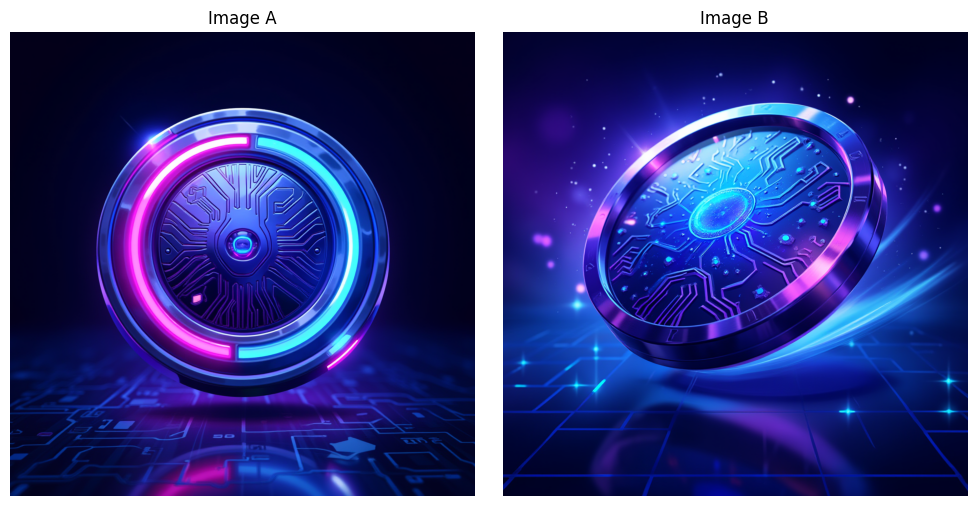

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

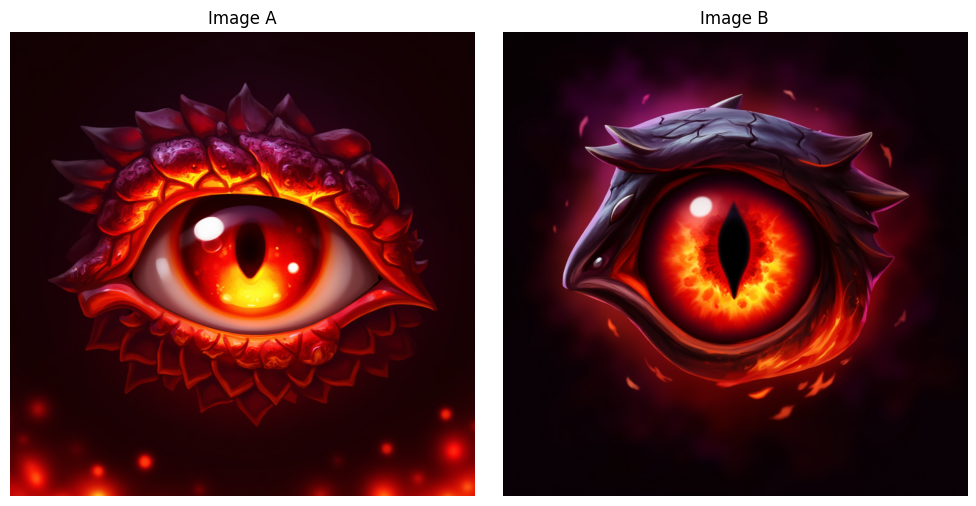

In [25]:
for prompt in prompts:
    inference_with_loras(prompt=f'p3r5on, {prompt}')